## Training Deep Neural Networks

In [1]:
# Necessary Imports
import tensorflow as tf
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Ignoring all the Warnings
import warnings
warnings.filterwarnings("ignore")

2024-04-14 10:04:30.323833: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-14 10:04:30.323930: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-14 10:04:30.455947: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**Directory to Store all the Images created**

In [2]:
IMAGE_PATH = Path() / "images" / "deep"
IMAGE_PATH.mkdir(parents=True, exist_ok=True)

**Helper Function to store High Resolution Pictures**

In [3]:
def save_fig(fig_id, tight_layout=True, extension="png", resolution=300):
    
    # Creating the File Path for every image being stored
    file_path = IMAGE_PATH / f"{fig_id}.{extension}"
    if tight_layout:
        plt.tight_layout()
        
    # Saving the Images
    plt.savefig(file_path, format=extension, dpi=resolution)

## The Vanishing / Exploding Gradients Problem

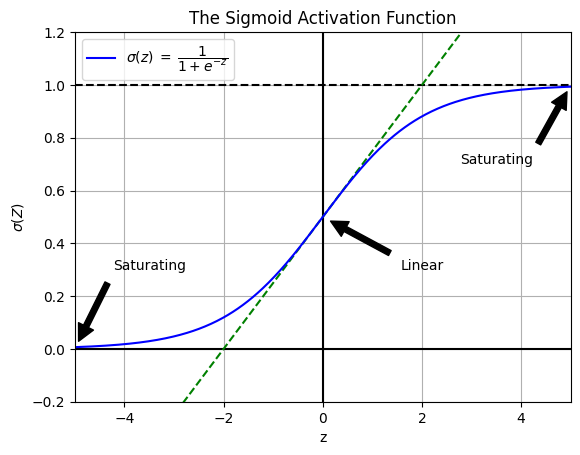

<Figure size 640x480 with 0 Axes>

In [4]:
# Sigmoid / Logistic Functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-5, 5, 500)

# Plotting the Sigmoid Function with the Vanishing and Exploding Gradient Problems

# --------------------- Plot Resolution ---------------------
# X - Axis
plt.plot([-5, 5], [0, 0], "k-")

# Y - Axis
plt.plot([0, 0], [-0.2, 1.2], "k-")

# Saturation Line - Upper bound of the Function
plt.plot([-5, 5], [1, 1], "k--")

# Linear Projection against Sigmoid
plt.plot([-5, 5], [-3/4, 7/4], "g--")

# --------------------- Plot Function ---------------------

# Sigmoid Function Plot
plt.plot(z, sigmoid(z), "b-", label="$\sigma(z) \; = \; \dfrac{1}{1 + e^{-z}}$")

# --------------------- Annotations ---------------------

# Arrow Property
props = dict(facecolor="black", shrink=0.1)

# Upperbound of the Function
plt.annotate("Saturating", xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=10, ha="center")

# Lowerbound of the Function
plt.annotate("Saturating", xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=10, ha="center")

# Liner Function
plt.annotate("Linear", xytext=(2, 0.3), xy=(0, 0.5), arrowprops=props, fontsize=10, ha="center")

# --------------------- Others ---------------------

plt.grid()
plt.title("The Sigmoid Activation Function")
plt.axis([-5, 5, -0.2, 1.2])
plt.xlabel("z")
plt.ylabel("$\sigma(Z)$")
plt.legend()
plt.show()

save_fig("sigmoid_saturation")

**Inference**

- Given the Sigmoid Function, we see that there are two saturation points for the function
- At 0 and 1 where the function is saturating the `Slope of the Function (Derivative)` is `close to 0 or Insignificant`
- Thus when training large models where the `flow of the derivative` takes place between `several layers during backpropagation`, due to very `small value of slope` the lower layers of the model have relatively no **changes made to its weights**.
- Thus we **Experience a Vanishing Gradients / Exploding Gradients Problem**.


**Dealing with the Vanishing and Exploding Gradient Problem**
--

## Glorot and He Initialisation

- The Glorot / Xavier / He Initialisation process initialises the weights connecting the layers randomly wrt the `Fan In` and `Fan Out` of the preceeding and succeeding layers during model building.

$$fan_{avg} = \frac{{fan_{in}} + {fan_{out}}}{2}$$

- Weights Initialised using:
$$ Normal \; Distribution \; with \; Mean \; 0 \; and \; Variance \; \sigma^2 \; = \; \frac{1}{fan_{avg}} $$

In [5]:
# He Initialization
dense = tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal")
print(dense)

# He Average Initialization
he_avg = tf.keras.initializers.VarianceScaling(scale=0.2, mode="fan_avg", distribution="uniform")
dense = tf.keras.layers.Dense(50, activation="relu", kernel_initializer=he_avg)
print(dense)

<Dense name=dense, built=False>
<Dense name=dense_1, built=False>


## Non Saturating Activation Functions

- Need:
    * Non Saturating Activation Functions were necessary to improve the number of active neurons present in a neuron network during training.
    * When using ReLU we have a saturation point where any value < 0 is always 0.
    * Thus the gradients during backpropagation didnt update the weights of these units due to negative weighted sum, leaving almost half of the neurons dead.
    
    
- Non Saturating Activation functions avoid this problem by providing a small value to the unit at every instance of Training
- This can ensure that the respective units play a role in pattern matching for longer before the model converges.

## Leaky Relu

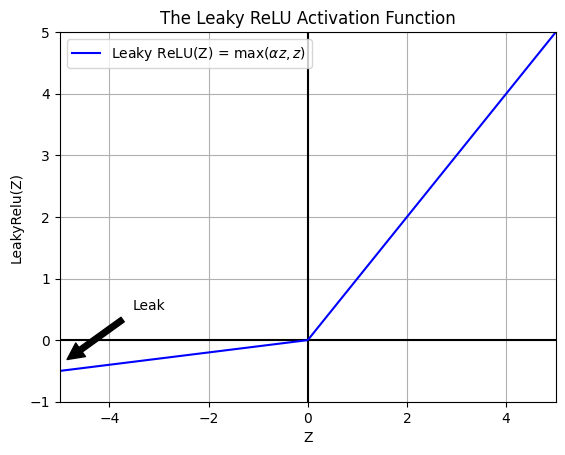

<Figure size 640x480 with 0 Axes>

In [6]:
# Leaky Relu Function
def leaky_relu(z, alpha):
    return np.maximum(z * alpha, z)

z = np.linspace(-5, 5, 400)

# Plotting the Leaky Relu Function to check slope

# --------------------- Plot Resolution ---------------------
# X - Axis
plt.plot([-5, 5], [0, 0], "k-")

# Y - Axis
plt.plot([0, 0], [-1, 5], "k-")

# --------------------- Plot Function ---------------------

plt.plot(z, leaky_relu(z, 0.1), "b-", label=r"Leaky ReLU(Z) = $\max(\alpha z, z)$")

# --------------------- Annotations ---------------------

props = dict(facecolor="black", shrink=0.1)
plt.annotate("Leak", xytext=(-3.2, 0.5), xy=(-5, -0.4), arrowprops=props, fontsize=10, ha="center")

# --------------------- Others ---------------------

plt.grid()
plt.xlabel("Z")
plt.ylabel("LeakyRelu(Z)")
plt.axis([-5, 5, -1, 5])
plt.legend()
plt.title("The Leaky ReLU Activation Function")
plt.show()

save_fig("Leaky_Relu_Plot")

**Inference**

- We can see that due to the leak being present in the Activation Function, the Gradients of the Function will always contain a slope
- Thus mostly removing the process of Dying ReLU's

In [7]:
# Defining Leaky ReLU's
leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.1)

# Using the Leaky ReLU
dense = tf.keras.layers.Dense(50, activation=leaky_relu, kernel_initializer="he_normal")
print(dense)

<Dense name=dense_2, built=False>


## ELU (Exponential Linear Unit)

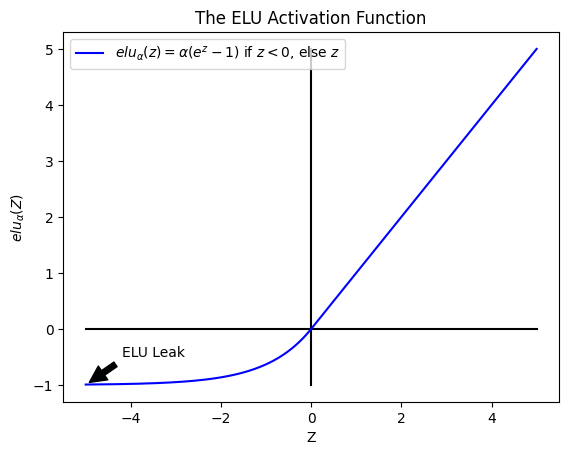

<Figure size 640x480 with 0 Axes>

In [8]:
# ELU Activation Function
def elu(z, alpha):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)
    
z = np.linspace(-5, 5, 400)

# Plotting the ELU Activation Function to visualise the slope

# --------------------- Plot Resolution ---------------------

plt.plot([-5, 5], [0, 0], "k-")
plt.plot([0, 0], [-1, 5], "k-")

# --------------------- Plot Function ---------------------

plt.plot(z, elu(z, 1), "b-", label=r"$elu_\alpha(z) = \alpha (e^z - 1)$ if $z < 0$, else $z$")

# --------------------- Annotations ---------------------

props = dict(facecolor="black", shrink=0.1)
plt.annotate("ELU Leak", xytext=(-3.5, -0.5), xy=(-5, -1), arrowprops=props, fontsize=10, ha="center")

# --------------------- Others ---------------------

plt.legend(loc="upper left")
plt.xlabel("Z")
plt.ylabel(r"$elu_{\alpha}(Z)$")
plt.title("The ELU Activation Function")
plt.show()

save_fig("ELU_Plot")

**Inference**

- The ELU Activation function provides a smooth curve for efficient Gradient Descent calculation even when z < 0.
- This increases the Training Speed of the Model and promotes faster convergence.
- The Only **drawback to ELU** is that **it takes longer calculation time**.

In [9]:
# Implementing an ELU
dense = tf.keras.layers.Dense(50, activation="elu", kernel_initializer="he_normal")
print(dense)

<Dense name=dense_3, built=False>


## SELU (Scaled ELU)

- It was provided by Günter Klambauer et al. in 2017.
- The SELU Activation function under a `specific set of conditions` provides a **`self normalising`** while maintaining a **`high convergance rate`** and avoiding the **`vanishing / exploding gradient problem`**.
- It avoids the vanishing / exploding gradient problem by maintaining `mean = 0 and standard deviation = 1` during training.
- As a result the `SELU activation function when used outperforms` all other activation functions especially while training deep neural networks.

**ERFC (Error Function / Gaussian Error Function)**

$$ERFC = 1 - ERF(Z)$$

**ERF (Mathematical Error Function)**

$$ERF(Z) = \frac{2}{\sqrt{\pi}} \; \int_{0}^{z} \; \exp^{-t^{2}} \; dt$$

The above error function is then utilised by the `Scale` and `Alpha` parameters in the `SELU Layers` to ensure the **mean** ($\mu$) output of each neuron remains close to 0 and the **standard deviation** ($\sigma^2$) close to 1.

**Scale$\lambda_{01}$ and Alpha $\alpha_{01}$**

$$\alpha_{01} \; = \; - \frac{\sqrt{\frac{2}{\pi}}}{ERFC\left(\frac{1}{\sqrt{2}}\right) \; {\exp\left(\frac{1}{2}\right)} \; - 1}$$

$$\lambda_{01} \; = \; \left(1 - ERFC\left(\frac{1}{\sqrt{2}}\right) \; \sqrt{e}\right) \; \sqrt{2\pi} \;\; \left(2 \; ERFC\left(\sqrt{2}\right) \; e^{2} \; + \; \pi \; ERFC\left(\frac{1}{\sqrt{2}}\right)^{2} \; e \; -2 \; \left(2 \; + \; \pi\right) \; ERFC \left(\frac{1}{\sqrt{2}}\right) \; \sqrt{e} \; + \; \pi \; + \; 2\right)^{-1/2}$$

**Conditions for the application of SELU**

- All deep layers defined in the model should utilise the `SELU` activation function
- All the input features provided to the model must be standardised (mean 0 and standard deviation 1)
- The model should be a sequential model without skip connections

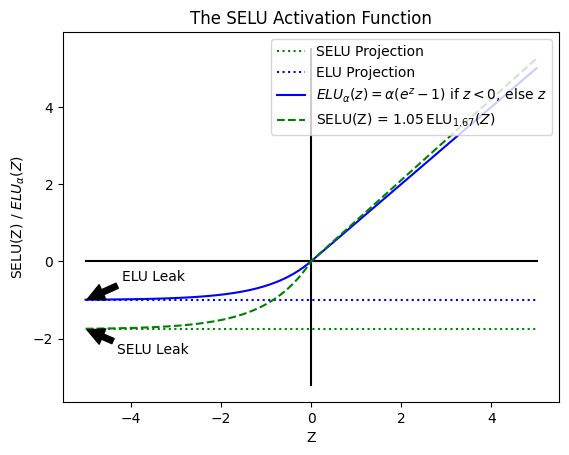

<Figure size 640x480 with 0 Axes>

In [10]:
from scipy.special import erfc

# Implementing the Above Equations using Numpy
alpha_01 = -np.sqrt(2 / np.pi) / (erfc(1 / np.sqrt(2)) * np.exp(1 / 2) - 1)
scale_01 = (
    (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e))
    * np.sqrt(2 * np.pi)
    * (
        2 * erfc(np.sqrt(2)) * np.e ** 2
        + np.pi * erfc(1 / np.sqrt(2)) ** 2 * np.e
        - 2 * (2 + np.pi) * erfc(1 / np.sqrt(2)) * np.sqrt(np.e)
        + np.pi + 2
    ) ** (-1 / 2)
)

# Defining the SELU Activation Function
def selu(z, scale=scale_01, alpha=alpha_01):
    return scale * elu(z, alpha)

# Plotting the SELU Activation Function to visualise the slope
z = np.linspace(-5, 5, 400)

# --------------------- Plot Resolution ---------------------

plt.plot([-5, 5], [0, 0], "k-")
plt.plot([0, 0], [-3.2, 5.5], "k-")
plt.plot([-5, 5], [-1.758, -1.758], "g:", label="SELU Projection")
plt.plot([-5, 5], [-1, -1], "b:", label="ELU Projection")

# --------------------- Plot Function ---------------------

plt.plot(z, elu(z, 1), "b-", label=r"$ELU_\alpha(z) = \alpha (e^z - 1)$ if $z < 0$, else $z$")
plt.plot(z, selu(z), "g--", label=r"SELU(Z) = $1.05 \, $ELU$_{1.67} (Z)$")

# --------------------- Annotations ---------------------

props = dict(facecolor="black", shrink=0.05)
plt.annotate("ELU Leak", xytext=(-3.5, -0.5), xy=(-5, -1), arrowprops=props, fontsize=10, ha="center")
plt.annotate("SELU Leak", xytext=(-3.5, -2.4), xy=(-5, -1.758), arrowprops=props, fontsize=10, ha="center")

# --------------------- Others ---------------------

plt.legend(loc="upper right")
plt.xlabel("Z")
plt.ylabel(r"SELU(Z) / $ELU_{\alpha}(Z)$")
plt.title("The SELU Activation Function")
plt.show()

save_fig("SELU_V_ELU_Plot")

In [11]:
# Implementing a SELU Layer
dense = tf.keras.layers.Dense(50, activation="selu", kernel_initializer="lecun_normal")
print(dense)

<Dense name=dense_4, built=False>


**Using a SELU Network for Fashion Mnist**
--

**Building a 100 layer Self-Normalising Model**

In [12]:
# Starting State for the Model
tf.keras.backend.clear_session()
tf.random.set_seed(1730)

# ------------------------- Building the Model -------------------------
selu_model = tf.keras.Sequential()

# ------------------------- Input Layer to Flatten the 2D Image ------------------------------
selu_model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))

# ------------------------- Deep Layers ------------------------------
for i in range(100):
    selu_model.add(tf.keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
    
# ------------------------- Output Layer -------------------------
selu_model.add(tf.keras.layers.Dense(10, activation="softmax"))

# ------------------------- Compiling the Model -------------------------
selu_model.compile(
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
    optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3)
)

# ------------------------- Viewing the Architecture of the Model -------------------------
selu_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 100)            │        10,10

 Total params: 1,079,410 (4.12 MB)

 Trainable params: 1,079,410 (4.12 MB)

 Non-trainable params: 0 (0.00 B)

**Loading the Data**

In [13]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

# Splitting the Dataset
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

# Normalising the Data
X_train = X_train / 255
X_valid = X_valid / 255
X_test = X_test / 255

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [14]:
# Adjusting the Mean and Variance of the Data
pixel_mean = X_train.mean(axis=0, keepdims=True)
pixel_std = X_train.std(axis=0, keepdims=True)

# Scaling the Pixels
X_train_scaled = (X_train - pixel_mean) / pixel_std
X_valid_scaled = (X_valid - pixel_mean) / pixel_std
X_test_scaled = (X_test - pixel_mean) / pixel_std

In [15]:
history = selu_model.fit(
    X_train_scaled, y_train,
    epochs=10, validation_data=(X_valid_scaled, y_valid)
)

Epoch 1/10
  20/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.1348 - loss: 2.6381

I0000 00:00:1713089101.549030      69 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 30s 12ms/step - accuracy: 0.4247 - loss: 1.5188 - val_accuracy: 0.5278 - val_loss: 1.1761
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6006 - loss: 1.0398 - val_accuracy: 0.6836 - val_loss: 0.7909
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6624 - loss: 0.8653 - val_accuracy: 0.6590 - val_loss: 0.9026
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.7013 - loss: 0.7999 - val_accuracy: 0.7536 - val_loss: 0.6707
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7478 - loss: 0.6709 - val_accuracy: 0.7794 - val_loss: 0.5928
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.7797 - loss: 0.5975 - val_accuracy: 0.7894 - val_loss: 0.5858
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7782 - loss: 0.6024 - val_accuracy: 0.7876 - val_loss: 0.5771
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.7902 - loss: 0.5696 - va

**Building a 100 Layer ReLU model**

In [16]:
# Starting State for the Model
tf.keras.backend.clear_session()
tf.random.set_seed(1730)

# ------------------------- Building the Model -------------------------
relu_model = tf.keras.models.Sequential()

# ------------------------- Input Layer to Flatten the 2D Image ------------------------------
relu_model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))

# ------------------------- Deep Layers ------------------------------
for i in range(100):
    relu_model.add(tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
    
# ------------------------- Output Layer -------------------------
relu_model.add(tf.keras.layers.Dense(10, activation="softmax"))

# ------------------------- Compiling the Model -------------------------
relu_model.compile(
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
    optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3)
)

In [17]:
history = relu_model.fit(
    X_train_scaled, y_train,
    epochs=10, validation_data=(X_valid_scaled, y_valid)
)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 31s 13ms/step - accuracy: 0.1410 - loss: 2.2350 - val_accuracy: 0.2574 - val_loss: 1.7693
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.3500 - loss: 1.5547 - val_accuracy: 0.4992 - val_loss: 1.1434
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.5281 - loss: 1.1164 - val_accuracy: 0.6598 - val_loss: 0.8408
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.5977 - loss: 0.9729 - val_accuracy: 0.7372 - val_loss: 0.7564
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6651 - loss: 0.9223 - val_accuracy: 0.7068 - val_loss: 0.8012
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.7484 - loss: 0.6963 - val_accuracy: 0.7172 - val_loss: 0.8380
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.7518 - loss: 0.6861 - val_accuracy: 0.7360 - val_loss: 0.7569
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.7432 - loss: 

**Inference**
- Even though the **`SELU Model`** is having 100 deep layers it continues to make good progress with every training epoch.
- The **`RELU Model`** having 100 deep layers doesnt make the same progress as SELU. Further its learning rate is slow and it is plagued by the **`Vanishing / Exploding Gradients`** problem over longer epochs.

**Summarising Activation Functions**
--

<h3><center>SELU > ELU > Leaky ReLU (and its variants) > ReLU > Tanh > Sigmoid</center></h3>

- ELU is the best choice if the network isnt self-normalising
- To improve training time for larger network Leaky ReLU is the best choice due to increased calculations in ELU's
- If all of the above arent feasible then use ReLU's

## Working with Batch Normalisation

- Batch Normalisation is a technique that consist of **`adding an operation`** to the layers of the model **`before and after`** the application of an activation function.
- It **`Zero Centers and Normalises`** each input followed by **`scaling and shifting`** of the result to ensure complete removal of the **`vanishing and exploding gradient`** problem during the entire training process.
- It was proposed by **`Sergey Ioffe and Christian Szegedy`** et al.
- Heres is a link to the Paper: Ioffe, S., & Szegedy, C. (2015). Batch Normalization: Accelerating Deep Network Training b y Reducing Internal Covariate Shift. https://arxiv.org/pdf/1502.03167.pdf 

**Understanding Batch Normalisation**
- In order to estimate the mean and standard deviation for each input the algorithm needs to perform the below operations
- Mean for a mini batch ($\mu_{B}$) during training: $$\mu_{B} \; = \; \frac{1}{m_{B}} \; \sum_{i = 1}^{m_{B}} \; x^{i}$$
- Variance of a mini batch ($\sigma_{B}^{2}$) during training: $$\sigma_{B}^{2} \; = \; \frac{1}{m_{B}} \; \sum_{i = 1}^{m_{B}} \; \left( x^i \; - \; \mu_B\right)^2$$
- The square root of the variance provides standard deviation ($\sigma_B$)
- The Zero Centered and Normalised Input Vector ($\hat{x}^{(i)}$) for each instance during training: $$\hat{x}^{(i)} \; = \; \frac{x^{(i)} \; - \; \mu_B}{\sqrt{\sigma_{B}^{2} \; + \; \epsilon}}$$
- The resulting input ($z^{(i)}$) after rescaling and shifting using Batch Norm: $$z^{(i)} \; = \; \gamma \; \otimes \; \hat{x}^{(i)} \; + \; \beta$$

**Important**
- Here $m_{B}$ is the total no of training examples present in the current mini batch
- Here $\gamma$ is the output scale parameter for any given layer
- Here $\beta$ is the output shift term for any given layer
- Here $\otimes$ denotes element-wise multiplication for dot product of all the scalars
- Here $\epsilon$ is the smoothening term used to prevent zero division

**Also Important**
- During testing since the model cannot estimate the $\mu$ and $\sigma$ without parsing through all the examples in the test set it fails to use good values to scale and shift the test set instance.
- This hinders the accuracy and predictions made by the model.
- Thus during the Batch Normalisation in training the model also keeps track of a moving average for $\mu$ and $\sigma$ thus arrving at a good estimate for the entire distribution of the training set.
- Hence the $\mu$ and $\sigma$ estimated during training are then used to shift and scale the instances during testing.

In [18]:
# Starting State for the Model
tf.keras.backend.clear_session()
tf.random.set_seed(1730)

# -------------------- Building the Model -------------------------
batch_norm_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    
    # Using the BatchNorm after the first (input) layer reduces the need for normalisation of the dataset
    tf.keras.layers.BatchNormalization(),
    
    # Deep Layers
    tf.keras.layers.Dense(512, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    
    # Output Layer
    tf.keras.layers.Dense(10, activation="softmax")
])

# -------------------- Viewing the Model Summary -------------------------
batch_norm_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 542,026 (2.07 MB)

 Trainable params: 538,922 (2.06 MB)

 Non-trainable params: 3,104 (12.12 KB)

**Viewing the Parameters of the First Batch Normalisation Layer**

In [19]:
[(var.name, var.trainable) for var in batch_norm_model.layers[1].variables]

[('gamma', True),
 ('beta', True),
 ('moving_mean', False),
 ('moving_variance', False)]

**Inference**
- During Backprop alongwith the parameters of the model $\gamma \; and  \; \beta$ are also trainable while $\mu \; and \; \sigma$ arent trainable
- Thus first batch norm: 4 * 784 = 3136
- Similarly: 2048 = 512 * 4 and 1024 = 256 * 4
- While the total no of actual trainable parameters ($\gamma \; and \; \sigma $) = 3136 + 2048 + 1024 / 2 = 3104
- Thus there are also 3104 non trainable parameters

**Viewing the Performance of the Model over 10 epochs**

In [20]:
# -------------------- Compiling the Model -------------------------
batch_norm_model.compile(
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
    optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3)
)

# ------------------------- Training the Model -------------------------
history = batch_norm_model.fit(
    
    # Using the non scaled training data to see the performance of Batch Norm
    X_train, y_train,
    epochs=10, validation_data=(X_valid, y_valid)

)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6134 - loss: 1.1720 - val_accuracy: 0.8068 - val_loss: 0.5472
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8050 - loss: 0.5678 - val_accuracy: 0.8276 - val_loss: 0.4748
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8266 - loss: 0.4967 - val_accuracy: 0.8374 - val_loss: 0.4432
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8405 - loss: 0.4589 - val_accuracy: 0.8422 - val_loss: 0.4246
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8506 - loss: 0.4331 - val_accuracy: 0.8462 - val_loss: 0.4118
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8569 - loss: 0.4134 - val_accuracy: 0.8508 - val_loss: 0.4021
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8620 - loss: 0.3973 - val_accuracy: 0.8534 - val_loss: 0.3942
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8672 - loss: 0.3835 - 

**Inference**
- The model does very well in the first 10 epochs learning at par with the SELU Model
- The convergence rate of the model is very high similar to the SELU Model

**Important**
- Batch Normalisation can also be used before and after an Activation Function in the deep layers of the neural network as suggested by the authors.
- In following the above approach we can remove the bias terms in the units of each layer.
- Since the offset parameter for Batch Normalisation performs the same duty.

In [21]:
# Starting State for the Model
tf.keras.backend.clear_session()
tf.random.set_seed(1730)

# -------------------- Building the Model -------------------------
batch_norm_before_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    
    # Deep Layers
    tf.keras.layers.Dense(512, kernel_initializer="he_normal", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    
    tf.keras.layers.Dense(256, kernel_initializer="he_normal", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    
    # Output Layer
    tf.keras.layers.Dense(10, activation="softmax")
])

In [22]:
# -------------------- Compiling the Model -------------------------
batch_norm_before_model.compile(
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
    optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3)
)

# ------------------------- Training the Model -------------------------
history = batch_norm_before_model.fit(
    
    # Using the non scaled training data to see the performance of Batch Norm
    X_train, y_train,
    epochs=10, validation_data=(X_valid, y_valid)

)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5809 - loss: 1.2962 - val_accuracy: 0.7930 - val_loss: 0.6165
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7875 - loss: 0.6373 - val_accuracy: 0.8214 - val_loss: 0.5204
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8123 - loss: 0.5516 - val_accuracy: 0.8304 - val_loss: 0.4765
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8260 - loss: 0.5073 - val_accuracy: 0.8378 - val_loss: 0.4495
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8356 - loss: 0.4781 - val_accuracy: 0.8436 - val_loss: 0.4304
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8430 - loss: 0.4565 - val_accuracy: 0.8472 - val_loss: 0.4161
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8479 - loss: 0.4392 - val_accuracy: 0.8500 - val_loss: 0.4049
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8520 - loss: 0.4249 - 

## Gradient Clipping

- Gradient Clipping as the name suggests is used to **`clip gradients`** that are **`beyond a preset threshold`**.
- This is done to control the gradients from Vanishing or Exploding.
- Although Batch Normalisation works prefectly for most Neural Network architectures it is hard to implment it in RNNs.
- Thus **`Gradient Clipping`** is used to **`control gradients in RNNs`**.

In [23]:
# Approach - 1: Clipvalue Parameter
optimizer = tf.keras.optimizers.SGD(clipvalue=1, learning_rate=1e-3)

# -------------------- Compiling the Model -------------------------
batch_norm_before_model.compile(
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
    optimizer=optimizer
)

In [24]:
# Approach - 2: Clipnorm Parameter
optimizer = tf.keras.optimizers.SGD(clipnorm=1, learning_rate=1e-3)

# -------------------- Compiling the Model -------------------------
batch_norm_before_model.compile(
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
    optimizer=optimizer
)

**Important**
- The Clipnorm approach has one major advantage over the Clipvalue.
- The Clipnorm approach always preserves the direction of the gradient vector while clipping the gradients.
- Thus the Gradient is clipped only when the **`l2 norm`** of the Gradient is past a preset threshold.

## Transfer Learning

- The Process of Reusing a Pretrained model for a domain specific problem.
- Building **`model_A`** which specialises on all classes but "T-shirt/top and Pullover"
- Building **`model_B`** which specialises on the classes "T-shirt/top and Pullover"

In [25]:
# Names of all the classes in Fashion MNIST
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Categorising the Class for Model-B
pos_class_id = class_names.index("T-shirt/top")
neg_class_id = class_names.index("Pullover")

def split_dataset(X, y):
    """
    Parameters:
        X: Takes the array of features
        y: Takes the array of targets
    Returns:
        Returns a tuple of Datasets for Model A followed by Model B to be used in transfer learning
    """
    
    # Checking for all the classes in the targets that match the positive and negative class
    y_split_B = (y == pos_class_id) | (y == neg_class_id)
    
    # Taking the Inverse for Model A since it trains on all but the given classes
    y_A = y[~y_split_B]
    
    # Taking the subsection of Target for Model B and classifying the target among the classes
    y_B = (y[y_split_B] == pos_class_id).astype(np.float32)
    
    # Acquiring the Ids of Classes for Model A
    old_classes = list(set(range(10)) - set([pos_class_id, neg_class_id]))
    
    # Reordering the IDs of the Old Classes for Model A
    for old_class_id, new_class_id in zip(old_classes, range(8)):
        y_A[y_A == old_class_id] = new_class_id
    
    # Returning a tuple of the Dataset for Model A followed by Model B
    return ((X[~y_split_B], y_A), (X[y_split_B], y_B))

**Breakdown of the Logic from the previous code cell**

In [26]:
# for i in range(10):
#     if (y_train[i] == pos_class_id):
#         print("Image of T-shirt/top")
#     elif (y_train[i] == neg_class_id):
#         print("Image of Pullover")
#     else:
#         print("Image of another class")
        
#     print("Class Index: ", y_train[i], end="\n\n")
    
for i in range(10):
    if (y_train[i] == pos_class_id) | (y_train[i] == neg_class_id):
        print("Image of T-shirt/top or Pullover")
    else:
        print("Image of another class")
        
    print("Class Index: ", y_train[i], end="\n\n")

Image of another class
Class Index:  9

Image of T-shirt/top or Pullover
Class Index:  0

Image of T-shirt/top or Pullover
Class Index:  0

Image of another class
Class Index:  3

Image of T-shirt/top or Pullover
Class Index:  0

Image of T-shirt/top or Pullover
Class Index:  2

Image of another class
Class Index:  7

Image of T-shirt/top or Pullover
Class Index:  2

Image of another class
Class Index:  5

Image of another class
Class Index:  5



In [27]:
(y_train == pos_class_id)

array([False,  True,  True, ..., False,  True, False])

In [28]:
~(y_train == pos_class_id)

array([ True, False, False, ...,  True, False,  True])

In [29]:
y_train[((y_train == pos_class_id) | (y_train == neg_class_id))].astype(np.float32)

array([0., 0., 0., ..., 2., 0., 2.], dtype=float32)

In [30]:
set(range(10)) - set([pos_class_id, neg_class_id])

{1, 3, 4, 5, 6, 7, 8, 9}

In [31]:
# [0, 1, 2, ..... , 9]
a = np.array([range(10)])
print(a)

# Maps the condition on A and returns a boolean array
b = (a == pos_class_id) | (a == neg_class_id)
print(b)

# Returns a subsection of A which comprises of elements passing the above condition
c = a[b]
print(c)

# Returns a boolean array where true for the positive class targets
c = a[b] == pos_class_id
print(c)

# Converting the Boolean Array to classes 0 and 1
c = c.astype(np.float32)
print(c)

[[0 1 2 3 4 5 6 7 8 9]]
[[ True False  True False False False False False False False]]
[0 2]
[ True False]
[1. 0.]


**Splitting the Dataset for the Models**

In [32]:
(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)

print("Shapes of Set A: ")
print("Shape of Model A Training Set: ", X_train_A.shape)
print("Shape of Model A Validation Set: ", X_valid_A.shape)
print("Shape of Model A Testing Set: ", X_test_A.shape)

print("\nShapes of Set B:")
print("Shape of Model B Training Set: ", X_train_B.shape)
print("Shape of Model B Validation Set: ", X_valid_B.shape)
print("Shape of Model B Testing Set: ", X_test_B.shape)

Shapes of Set A: 
Shape of Model A Training Set:  (44011, 28, 28)
Shape of Model A Validation Set:  (3989, 28, 28)
Shape of Model A Testing Set:  (8000, 28, 28)

Shapes of Set B:
Shape of Model B Training Set:  (10989, 28, 28)
Shape of Model B Validation Set:  (1011, 28, 28)
Shape of Model B Testing Set:  (2000, 28, 28)


**Working on Model A**

In [33]:
# Clearing the Cache and Call List
tf.keras.backend.clear_session()
tf.random.set_seed(1730)

# -------------------- Building the Model -------------------------
model_A = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    
    # Acts as a feature scaler and normalisation layer
    tf.keras.layers.BatchNormalization(),
    
    # Deep Layers
    tf.keras.layers.Dense(128, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    
    # Output Layer
    tf.keras.layers.Dense(8, activation="softmax")
])

# -------------------- Compiling the Model -------------------------
model_A.compile(
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
    optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3)
)

# -------------------- Training the Model -------------------------
history = model_A.fit(
    X_train_A, y_train_A, validation_data=(X_valid_A, y_valid_A), epochs=20
)

# -------------------- Saving the Model for Transfer Learning -------------------------
model_A.save("my_model_A.keras")

Epoch 1/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5824 - loss: 1.1955 - val_accuracy: 0.8195 - val_loss: 0.5522
Epoch 2/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8121 - loss: 0.5864 - val_accuracy: 0.8541 - val_loss: 0.4453
Epoch 3/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8409 - loss: 0.4905 - val_accuracy: 0.8684 - val_loss: 0.3929
Epoch 4/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8563 - loss: 0.4381 - val_accuracy: 0.8772 - val_loss: 0.3611
Epoch 5/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8678 - loss: 0.4031 - val_accuracy: 0.8889 - val_loss: 0.3397
Epoch 6/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8764 - loss: 0.3776 - val_accuracy: 0.8927 - val_loss: 0.3243
Epoch 7/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8824 - loss: 0.3573 - val_accuracy: 0.8975 - val_loss: 0.3128
Epoch 8/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8873 - loss: 0.3408 - 

**Working with Model B**

In [34]:
# Clearing the Cache and Call List
tf.keras.backend.clear_session()
tf.random.set_seed(1730)

# -------------------- Building the Model -------------------------
model_B = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    
    # Acts as a feature scaler and normalisation layer
    tf.keras.layers.BatchNormalization(),
    
    # Deep Layers
    tf.keras.layers.Dense(128, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    
    # Output Layer
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# -------------------- Compiling the Model -------------------------
model_B.compile(
    loss="binary_crossentropy",
    metrics=["accuracy"],
    optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3)
)

# -------------------- Training the Model -------------------------
history = model_B.fit(
    X_train_B, y_train_B, validation_data=(X_valid_B, y_valid_B), epochs=20
)

# -------------------- Evaluating the Model before Transfer Learning -------------------------
model_B.evaluate(X_test_B, y_test_B)

Epoch 1/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7992 - loss: 0.4513 - val_accuracy: 0.9347 - val_loss: 0.2197
Epoch 2/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9307 - loss: 0.2130 - val_accuracy: 0.9416 - val_loss: 0.1723
Epoch 3/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9430 - loss: 0.1747 - val_accuracy: 0.9436 - val_loss: 0.1562
Epoch 4/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9502 - loss: 0.1551 - val_accuracy: 0.9476 - val_loss: 0.1448
Epoch 5/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9538 - loss: 0.1425 - val_accuracy: 0.9505 - val_loss: 0.1375
Epoch 6/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9556 - loss: 0.1334 - val_accuracy: 0.9545 - val_loss: 0.1323
Epoch 7/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9580 - loss: 0.1265 - val_accuracy: 0.9555 - val_loss: 0.1283
Epoch 8/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9603 - loss: 0.1210 - val_accuracy: 0.

[0.11485226452350616, 0.9620000123977661]

**Inference**
- The model B achieves an accuracy of 97% without transfer learning

## Applying Transfer Learning

In [35]:
tf.keras.backend.clear_session()
tf.random.set_seed(1730)

# Loading Model A
loaded_model_A = tf.keras.models.load_model("my_model_A.keras")

# Adding the Layers of Model A
model_B_on_A = tf.keras.models.Sequential(
    
    # Adding all the layers but the output layer
    loaded_model_A.layers[:-1],
)

model_B_on_A.add(tf.keras.layers.Dense(1, activation="sigmoid", name="before_final"))

# Viewing the Model Architecture
model_B_on_A.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ before_final (Dense)            │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 114,848 (448.62 KB)

 Trainable params: 112,832 (440.75 KB)

 Non-trainable params: 2,016 (7.88 KB)

**Inference**
- This approach however create a new model which shares the layers from the loaded model
- Thus during training any weights that were updated in the new model which correspond to the loaded model will also be updated in the loaded model.
- Therefore, we need to create a clone of the model to create a new indepent model

In [36]:
# Helper Function to view the model performance
def plot_model(history, metric):
    plt.plot(history.history[metric], label=metric)
    plt.plot(history.history["val_" + metric], label="val_" + metric)
    
    plt.title(metric.capitalize() + " Performance")
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend()
    plt.grid()
    plt.show()

**Training Approach - 1**
- In this approach we freeze the weights of the pretrained layers and apply backpropagation only to the newly added layers
- This is done so that the rich weights of the pretrained layers arent modified during the initial epochs of training as the errors will be large.

In [37]:
# Cloned Model
tf.keras.backend.clear_session()
tf.random.set_seed(1730)

# -------------------- Cloning the loaded model for Transfer Learning -------------------------
model_A_clone = tf.keras.models.clone_model(loaded_model_A)
model_A_clone.set_weights(loaded_model_A.get_weights())

# -------------------- Building the Model -------------------------
final_transfer_model = tf.keras.models.Sequential(
    model_A_clone.layers[:-1]
)

final_transfer_model.add(
    tf.keras.layers.Dense(1, activation="sigmoid", name="final_output")
)

# -------------------- Freezing the pretrained layers of the Model -------------------------
for layer in final_transfer_model.layers[:-1]:
    layer.trainable = False
    
# -------------------- Compiling the Model -------------------------
final_transfer_model.compile(
    loss="binary_crossentropy",
    metrics=["accuracy"],
    optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3)
)

# -------------------- Training the Model -------------------------
history = final_transfer_model.fit(
    X_train_B, y_train_B, validation_data=(X_valid_B, y_valid_B), epochs=20
)

Epoch 1/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7561 - loss: 0.5019 - val_accuracy: 0.8368 - val_loss: 0.4143
Epoch 2/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8500 - loss: 0.3997 - val_accuracy: 0.8882 - val_loss: 0.3505
Epoch 3/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8884 - loss: 0.3429 - val_accuracy: 0.9021 - val_loss: 0.3108
Epoch 4/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9032 - loss: 0.3069 - val_accuracy: 0.9179 - val_loss: 0.2840
Epoch 5/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9135 - loss: 0.2822 - val_accuracy: 0.9219 - val_loss: 0.2646
Epoch 6/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9171 - loss: 0.2642 - val_accuracy: 0.9248 - val_loss: 0.2499
Epoch 7/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9202 - loss: 0.2505 - val_accuracy: 0.9268 - val_loss: 0.2384
Epoch 8/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9223 - loss: 0.2398 - val_accuracy: 0.

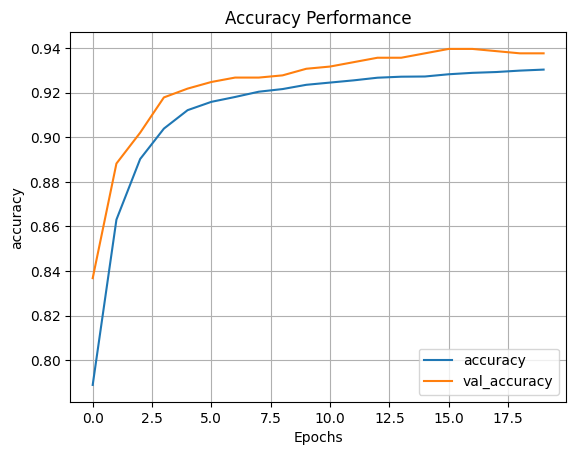

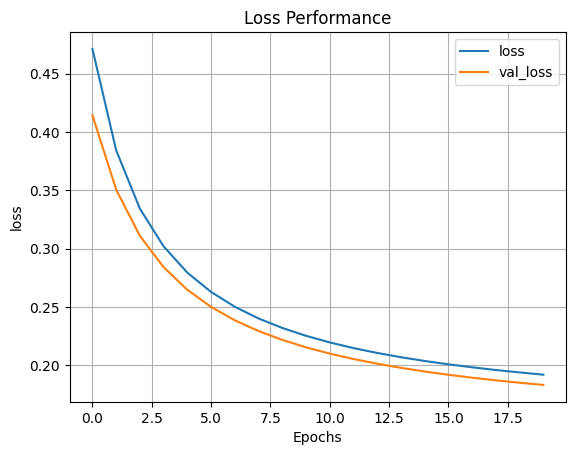

In [38]:
plot_model(history, "accuracy")
plot_model(history, "loss")

**Training Approach - 2**
- Here were train a preset number of epochs where the pretrained weights of the model are freezed.
- After completing the initial number of epochs the model is recompiled with the pretrained weights being trainable.
- This is done so that model can adapt the acquired pretrained weights specially for the given application.


In [39]:
tf.keras.backend.clear_session()
tf.random.set_seed(1730)

# -------------------- Building the Model -------------------------
final_trainable_transfer_model = tf.keras.models.Sequential(
    model_A_clone.layers[:-1]
)

final_trainable_transfer_model.add(
    tf.keras.layers.Dense(1, activation="sigmoid", name="final_trainable")
)

# -------------------- First Training Step -------------------------
for layer in final_trainable_transfer_model.layers[:-1]:
    layer.trainable = False
    
final_trainable_transfer_model.compile(
    loss="binary_crossentropy",
    metrics=["accuracy"],
    optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3)
)

final_trainable_transfer_model.fit(
    X_train_B, y_train_B, validation_data=(X_valid_B, y_valid_B), epochs=7
)

# -------------------- Second Training Step -------------------------
for layer in final_trainable_transfer_model.layers[:-1]:
    layer.trainable = True
    
final_trainable_transfer_model.compile(
    loss="binary_crossentropy",
    metrics=["accuracy"],
    optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3)
)

history = final_trainable_transfer_model.fit(
    X_train_B, y_train_B, validation_data=(X_valid_B, y_valid_B), epochs=14
)

Epoch 1/7
344/344 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6987 - loss: 0.5756 - val_accuracy: 0.7913 - val_loss: 0.4757
Epoch 2/7
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8111 - loss: 0.4439 - val_accuracy: 0.8457 - val_loss: 0.3923
Epoch 3/7
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8637 - loss: 0.3699 - val_accuracy: 0.8803 - val_loss: 0.3406
Epoch 4/7
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8876 - loss: 0.3238 - val_accuracy: 0.8971 - val_loss: 0.3060
Epoch 5/7
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9041 - loss: 0.2927 - val_accuracy: 0.9090 - val_loss: 0.2813
Epoch 6/7
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9102 - loss: 0.2704 - val_accuracy: 0.9179 - val_loss: 0.2628
Epoch 7/7
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9154 - loss: 0.2538 - val_accuracy: 0.9248 - val_loss: 0.2485
Epoch 1/14
344/344 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8524 - loss: 0.3752 - val_accuracy: 0.9377 - 

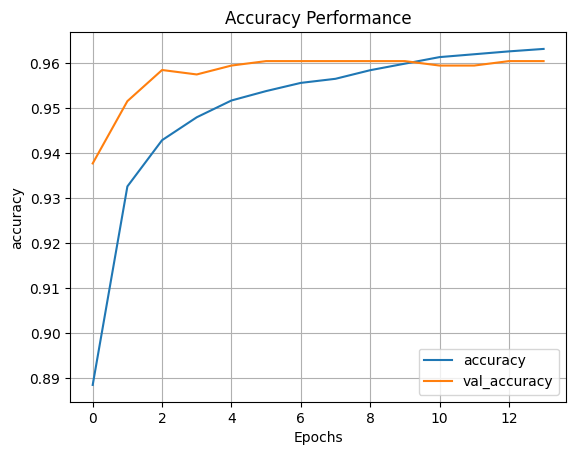

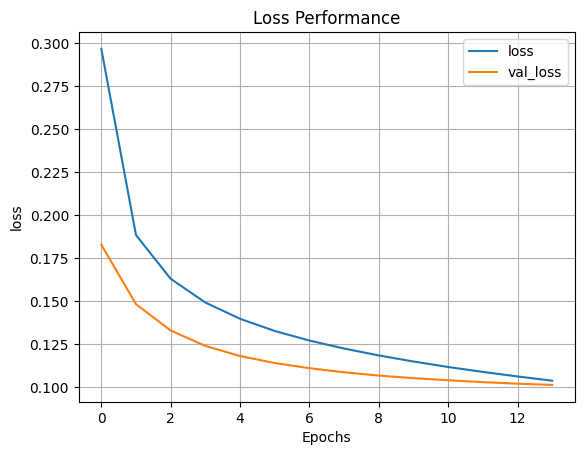

In [40]:
plot_model(history, "accuracy")
plot_model(history, "loss")

**Inference**
- By viewing the performance of the model in the two graphs we see that the second training approach yeilds better results.
- This is because intuitively the model is adapting its pretrained lower layers to catch better patterns and hence provide better results.

## Evaluating the performance of the model

In [41]:
# Model with Trainable Weights
final_trainable_transfer_model.evaluate(X_test_B, y_test_B)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9659 - loss: 0.1062


[0.11433105170726776, 0.9635000228881836]

In [42]:
# Model with Frozen Weights
final_transfer_model.evaluate(X_test_B, y_test_B)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9228 - loss: 0.1891


[0.18344706296920776, 0.9300000071525574]

In [43]:
# Before Transfer Learning
model_B.evaluate(X_test_B, y_test_B)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9641 - loss: 0.1185


[0.11485226452350616, 0.9620000123977661]

**Inference**
- Performance Difference to **`Model with frozen weights`**
$$\frac{1 - (100 - 96.24)}{100 - 89.45} \; = \; 64 \% \; reduction \, in \, errors$$

- Performance Difference to **`Model without Transfer Learning`**
$$\frac{1 - (100 - 96.24)}{100 - 95.95} \; = \; 7 \% \; reduction \, in \, errors $$

**Important**
- The above numbers might vary on runtime

**Gains in Transfer Learning**
--

- The Gains in transfer learning are more evident when training large models with many more deep layers.
- Since the above models are shallow, the difference of performance between the models with and without transfer learning is very small.
- Also since problem is relatively simple (binary classification).